In [1]:
import numpy as np

In [2]:
import torch

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
device = torch.device(DEVICE)

In [3]:
PIC_SIZE = 512 if torch.cuda.is_available() else 128

In [4]:
from torchvision import transforms

loader = transforms.Compose([
    transforms.Resize(PIC_SIZE),
    transforms.ToTensor(),
])

In [5]:
from PIL import Image

krakow = Image.open("./pics/krakow.jpg")
picasso = Image.open('./pics/picasso.jpg')

In [6]:
npkrakow = np.array(krakow)
krakowtensor = torch.Tensor(npkrakow)

krakowloaded = loader(krakow)
krakowtensor.shape

torch.Size([213, 213, 3])

In [7]:
cztery = krakowloaded.unsqueeze(0)
cztery = cztery.to(device, dtype=torch.float)

In [8]:
def imgloader(fp) -> torch.Tensor:
    img = Image.open(fp)
    loaded = loader(img) 
    loaded = loaded.unsqueeze(0)  # [..., np.newaxis]
    loaded_with_device = loaded.to(device, dtype=torch.float)
    return loaded_with_device

In [9]:
picasso = imgloader('./pics/picasso.jpg')
krakow = imgloader('./pics/krakow.jpg')
krakow.shape

torch.Size([1, 3, 128, 128])

In [10]:
unloader = transforms.ToPILImage()

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.ion()
picasso.shape

torch.Size([1, 3, 128, 128])

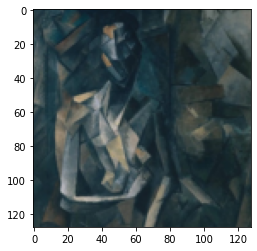

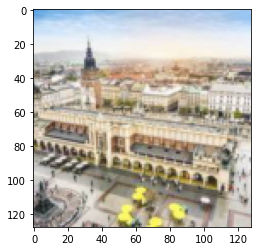

In [14]:
def showtensor(tensor: torch.Tensor) -> None:
    tensor = tensor.cpu().clone()
    unloaded = unloader(tensor.squeeze(0))
    plt.figure()
    plt.imshow(unloaded)
    
showtensor(picasso)
showtensor(krakow)

In [84]:
## pytorch module
import torch.nn as nn
import torch.nn.functional as F

# Ltotal(~p,~a,~x) =αLcontent(~p,~x) +βLstyle(~a,~x)

class ContentLoss(nn.Module):
    
    def __init__(self, p: torch.Tensor):
        self.p = p
        
    def forward(self, x) -> torch.Tensor:
        # Lcontent(→p,→x, l) = 1/2 ∑ i,j (Flij − Plij)².
        # return .5 * sum((x - p)**2)
        return F.mse_loss(x, self.p)

# t1 = torch.Tensor([2, 2])
# t2 = torch.Tensor([4, 4])
# ContentLoss(t1).forward(t2)

def gram(t: torch.Tensor) -> torch.Tensor:
    a, b, c, d = t.size()
    g = t.view(a*c, b*d)
    return g @ g.T / (a*b*c*d)
    
gram(picasso)

tensor([[0.0003, 0.0003, 0.0003,  ..., 0.0003, 0.0003, 0.0003],
        [0.0003, 0.0003, 0.0003,  ..., 0.0003, 0.0003, 0.0003],
        [0.0003, 0.0003, 0.0003,  ..., 0.0003, 0.0003, 0.0003],
        ...,
        [0.0003, 0.0003, 0.0003,  ..., 0.0005, 0.0005, 0.0004],
        [0.0003, 0.0003, 0.0003,  ..., 0.0005, 0.0005, 0.0004],
        [0.0003, 0.0003, 0.0003,  ..., 0.0004, 0.0004, 0.0004]])

In [85]:
class StyleLoss(nn.Module):
    
    def __init__(self, p: torch.Tensor):
        self.p = gram(p)
        
    def forward(self, x) -> torch.Tensor:
        # Lstyle(~a,~x) = ∑ wl E
        return F.mse_loss(gram(x), self.p)
    
StyleLoss(picasso).forward(krakow)

tensor(1.1434e-05)